<a href="https://colab.research.google.com/github/Tecindes/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracción

In [103]:
import requests

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"
respuesta = requests.get(url)

if respuesta.status_code == 200:
    dataURL = respuesta.json()
    print(f'Tipo devuelto de la solicitud HTTP GET : {type(dataURL)}')
else:
    print("Error en la conexión")

Tipo devuelto de la solicitud HTTP GET : <class 'list'>


In [104]:
_cantidadRegistros=len(dataURL)
print(f'Cantida de registros: {_cantidadRegistros} de la list dataURL')


tipos = set(type(elem) for elem in dataURL)
print(f'\nTipo de datos de los elementos de la lista dataURl:\n ',tipos)



Cantida de registros: 7267 de la list dataURL

Tipo de datos de los elementos de la lista dataURl:
  {<class 'dict'>}


#🔧 Transformación

In [105]:
import pandas as pd
print('Convertimos dataURL en un data frame:\n')
df = pd.DataFrame(dataURL)

print('Verificamos que no tenga columnas anidadas:')
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
        print(f"Columna anidada: {col}")

df.head(2)

Convertimos dataURL en un data frame:

Verificamos que no tenga columnas anidadas:
Columna anidada: customer
Columna anidada: phone
Columna anidada: internet
Columna anidada: account


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [106]:
import pandas as pd
print(f'El datafrane contiene columnas anidades es mas conveniente normalizamos la list dataURL\n')
df_telecom = pd.json_normalize(dataURL)

print(f'Mostramos los primeros 2 registros del dataframa df_telecom')
df_telecom.head(2)




El datafrane contiene columnas anidades es mas conveniente normalizamos la list dataURL

Mostramos los primeros 2 registros del dataframa df_telecom


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [107]:

print (f'Número de registros del data frame: ',df_telecom.shape[0])
print (f'\nNúmero registros de churn agrupados por su valor:\n',df_telecom['Churn'].value_counts())

Número de registros del data frame:  7267

Número registros de churn agrupados por su valor:
 Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [108]:
print(f'\nEliminamos los registros con data errada el campo Churn\n')
df_telecom.drop(df_telecom[~df_telecom['Churn'].isin(['No', 'Yes'])].index, inplace=True)


print (f'Número de registros del data frame: ',df_telecom.shape[0])
print (f'\nNúmero registros de churn agrupados por su valor:\n',df_telecom['Churn'].value_counts())


Eliminamos los registros con data errada el campo Churn

Número de registros del data frame:  7043

Número registros de churn agrupados por su valor:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [109]:
print('Agrupamos los valores de la columna "Churn", que es la que determina si un cliente dejo o no la empresa:\n',df_telecom['Churn'].value_counts())

print('\nCreamos un nuevo data frame con solo datos de los exclientes, para una análisis posterior')
df_telecom_exclientes=df_telecom[df_telecom['Churn'] == 'Yes']
print('Registros en df_telecom_exclientes:',len(df_telecom_exclientes))

Agrupamos los valores de la columna "Churn", que es la que determina si un cliente dejo o no la empresa:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Creamos un nuevo data frame con solo datos de los exclientes, para una análisis posterior
Registros en df_telecom_exclientes: 1869


In [110]:

print(f'Cantidad de registros con datos no númericos en account.Charges.Total:',
      len(df_telecom[pd.to_numeric(df_telecom['account.Charges.Total'], errors='coerce').isna()]))

Cantidad de registros con datos no númericos en account.Charges.Total: 11


In [111]:
print('Asignamos valor 0 a todos los registros con valor no númerico en account.Charges.Total')
df_telecom['account.Charges.Total'] = pd.to_numeric(
                                                    df_telecom['account.Charges.Total'], errors='coerce'
                                                    ).fillna(0)
print(f'\nVerificamos que ya no existan datos no númericos en account.Charges.Total:',
      df_telecom[pd.to_numeric(df_telecom['account.Charges.Total'], errors='coerce').isna()].shape[0])

Asignamos valor 0 a todos los registros con valor no númerico en account.Charges.Total

Verificamos que ya no existan datos no númericos en account.Charges.Total: 0


In [112]:
print('Cantidad clientes que tuvieron 0 meses de contrato campo "tenure":',len(df_telecom[df_telecom['customer.tenure'].isin([0])]))
print('Concuerda con los clientes que no registraban gastos, los mantendremos')

Cantidad clientes que tuvieron 0 meses de contrato campo "tenure": 11
Concuerda con los clientes que no registraban gastos, los mantendremos


In [113]:
print("Valores nulos:\n", df_telecom.isnull().sum())

Valores nulos:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [114]:
print('Verificamos tipos de datos del dataframe:\n')
df_telecom.info()
print('\nConclusiones:\n-customer.SeniorCitizen : Es tipo categoría no númerico (campo boolean que representa No, Yes)')

Verificamos tipos de datos del dataframe:

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.T

#📊 Carga y análisis

### Análisis exploratorio

In [115]:
print('Análisis univariado')
churn_counts = df_telecom['Churn'].value_counts(normalize=True)
print("\nDistribución de Churn:\n", churn_counts)


Análisis univariado

Distribución de Churn:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


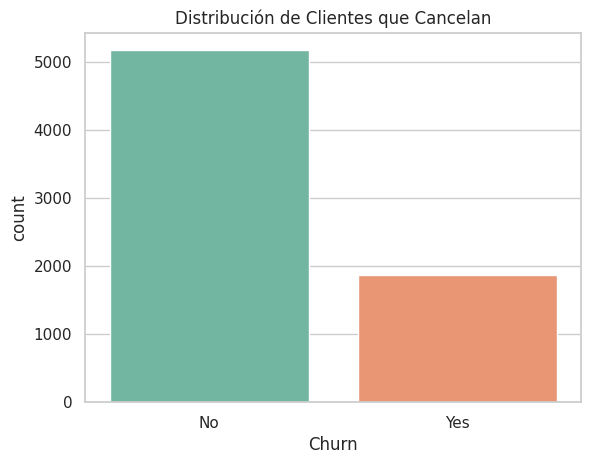

In [116]:
sns.countplot(x='Churn', hue='Churn', data=df_telecom, palette='Set2', legend=False)
plt.title('Distribución de Clientes que Cancelan')
plt.show()

Análisis Bivariado\Categorías vs Churn


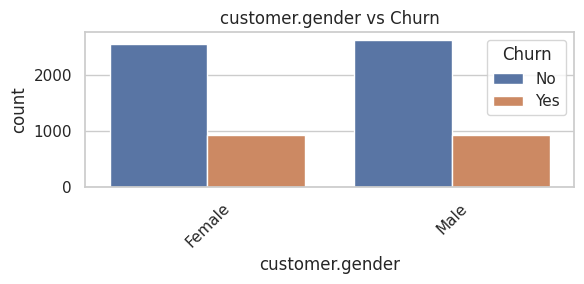

____________________________________________________________________________________________________




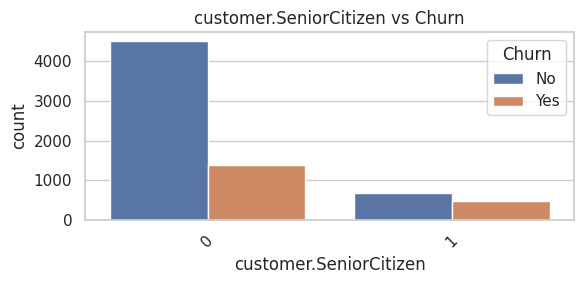

____________________________________________________________________________________________________




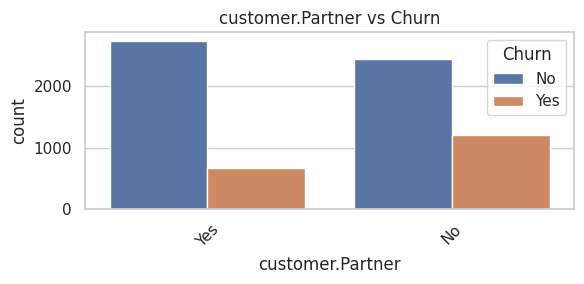

____________________________________________________________________________________________________




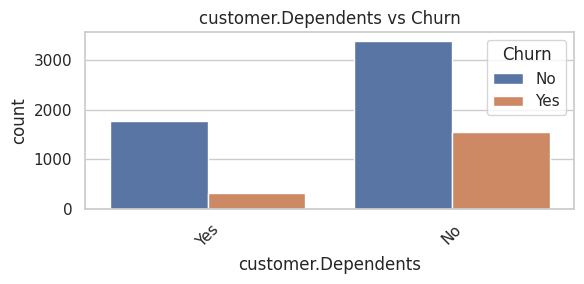

____________________________________________________________________________________________________




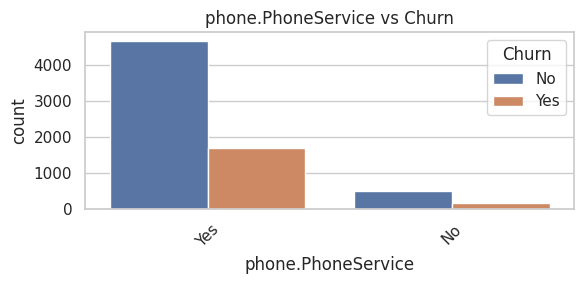

____________________________________________________________________________________________________




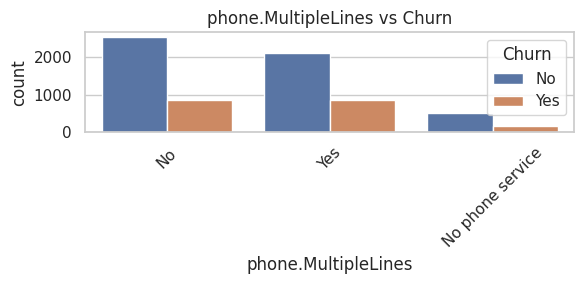

____________________________________________________________________________________________________




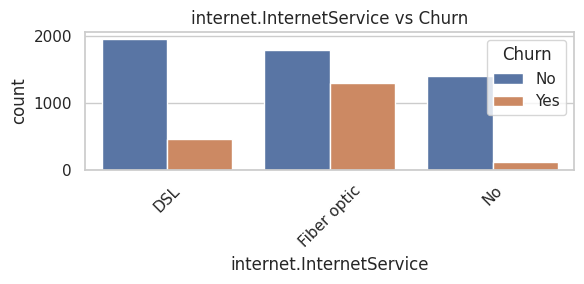

____________________________________________________________________________________________________




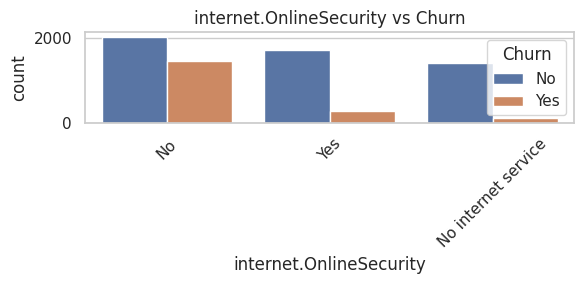

____________________________________________________________________________________________________




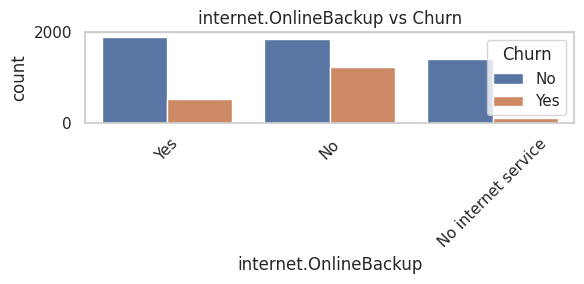

____________________________________________________________________________________________________




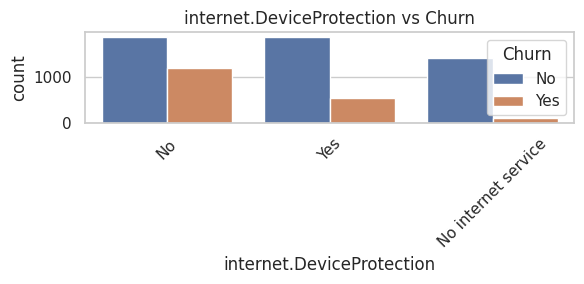

____________________________________________________________________________________________________




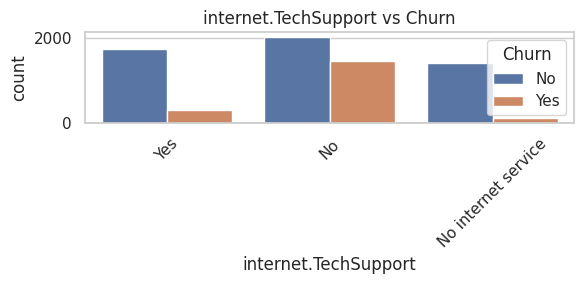

____________________________________________________________________________________________________




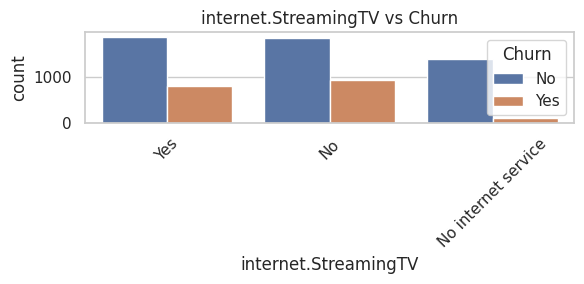

____________________________________________________________________________________________________




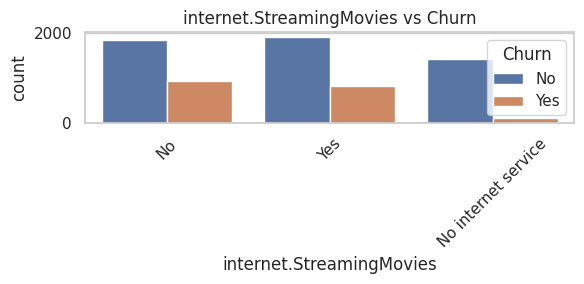

____________________________________________________________________________________________________




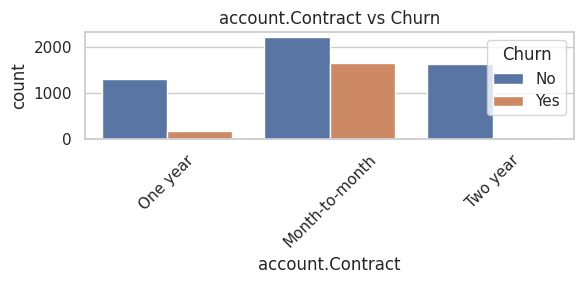

____________________________________________________________________________________________________




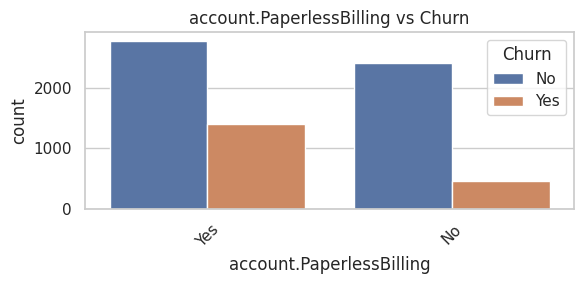

____________________________________________________________________________________________________




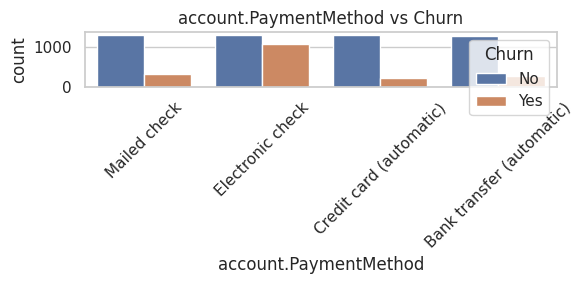

____________________________________________________________________________________________________




In [117]:
#from matplotlib.backends.backend_pdf import PdfPages
#pdf_path = "/content/drive/MyDrive/grafica.pdf"
categorical_cols = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
                    'phone.PhoneService', 'phone.MultipleLines',
                    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

print('Análisis Bivariado\Categorías vs Churn')
#with PdfPages(pdf_path) as pdf:
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Churn', data=df_telecom)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    #pdf.savefig()  # Guarda la figura en el PDF
    plt.show()
    plt.close()  # Cierra la figura
    print("_" * 100)
    print('\n')




Análisis Bivariado
Númericas vs Churn


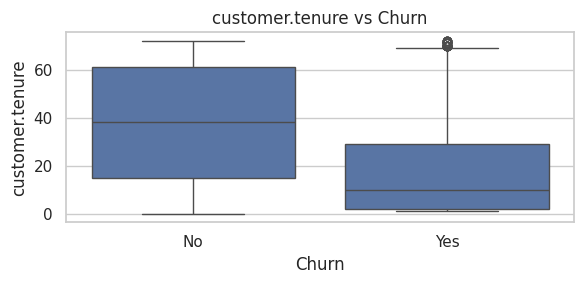

____________________________________________________________________________________________________




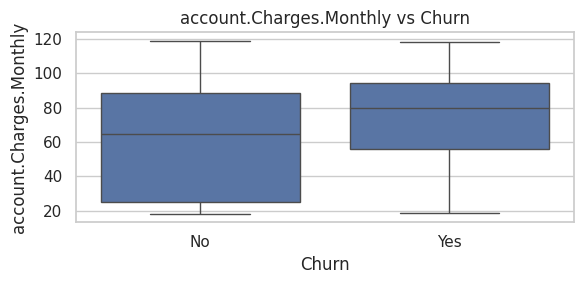

____________________________________________________________________________________________________




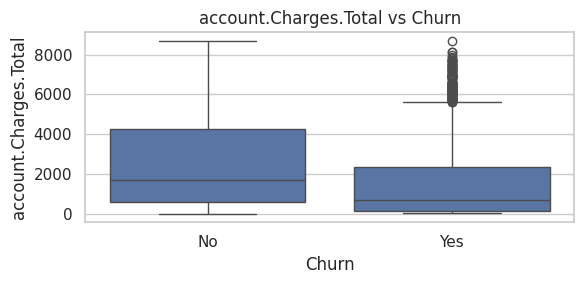

____________________________________________________________________________________________________




In [118]:
numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
print('Análisis Bivariado\nNúmericas vs Churn')
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Churn', y=col, data=df_telecom)
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()
    print("_" * 100)
    print('\n')

In [119]:
print ('Identificar que variables númericas tienen mayor influencia contra la variable "churn" Cancelación del servicio:')
corr = df_telecom[numerical_cols + ['Churn']].copy()
corr['Churn'] = corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print("\nCorrelación con Churn:\n", corr.corr()['Churn'].sort_values(ascending=False))


Identificar que variables númericas tienen mayor influencia contra la variable "churn" Cancelación del servicio:

Correlación con Churn:
 Churn                      1.000000
account.Charges.Monthly    0.193356
account.Charges.Total     -0.198324
customer.tenure           -0.352229
Name: Churn, dtype: float64



* Charges.Monthly : 0.19, la relación es muy baja, pero puede indicar que clientes con cargos mensuales altos son más propensos a irse.
* Charges.Total : -0.19, correlación negativa, sugiere que clientes con un historial largo de pagos tienden a quedarse.
* tenure : -0.35, correlación negativa fuerte, sugiere que clientes con más tiempo de permanencia es menos probable que se retire, es el valor más significativo lo que probablemente indique que los clientes nuevos son los mas propensos a abandonar el servicio.


### Análisis distribución general

In [120]:
print('1. Distribución General del Churn - Analiza cuántos clientes se han ido frente a los que se han quedado:')
df_telecom['Churn'].value_counts(normalize=True) * 100

1. Distribución General del Churn - Analiza cuántos clientes se han ido frente a los que se han quedado:


,proportion
Churn,
No,73.463013
Yes,26.536987


In [121]:
print('2. Análisis Univariado de Variables Relevantes - Comparar la tasa de churn según diferentes categorías:')
print('a. Tipo de contrato : Clientes con contrato mensual suelen tener mayor churn que aquellos con contratos anuales o de dos años.')
df_telecom.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()*100


2. Análisis Univariado de Variables Relevantes - Comparar la tasa de churn según diferentes categorías:
a. Tipo de contrato : Clientes con contrato mensual suelen tener mayor churn que aquellos con contratos anuales o de dos años.


Churn,No,Yes
account.Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


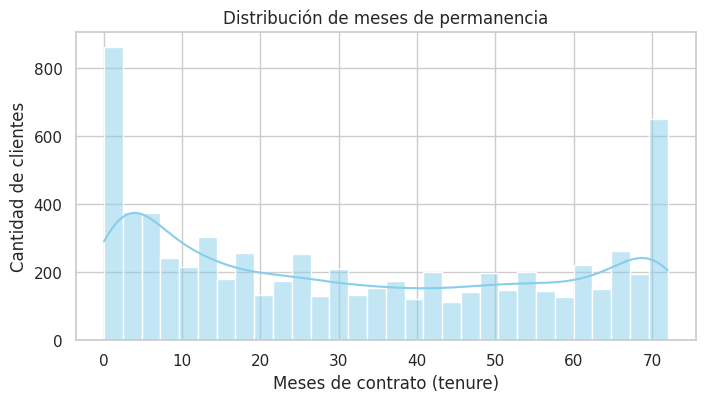

In [122]:
plt.figure(figsize=(8,4))
sns.histplot(df_telecom['customer.tenure'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de meses de permanencia")
plt.xlabel("Meses de contrato (tenure)")
plt.ylabel("Cantidad de clientes")
plt.show()

Distribución de clientes según los meses de permanencia
- Dos picos muy marcados:
  - En el mes 0: Hay una concentración significativa de clientes con cero meses de permanencia. Esto puede reflejar registros erróneos o clientes que se dieron de baja justo después de contratar el servicio.
  - En el mes 72: Otro pico muy alto. Esto probablemente representa a clientes antiguos que llevan el máximo tiempo posible en el sistema, posiblemente un contrato de 6 años.
- Distribución en el resto del eje:
  - Entre los meses 1 y 10 hay una caída rápida en la cantidad de clientes, lo que sugiere que muchos cancelan en los primeros meses.
  - A partir del mes 10 hasta cerca del 60, la cantidad de clientes se mantiene relativamente estable, pero baja.
  - La línea de densidad (KDE) muestra una forma de “U” invertida, reforzando que la mayoría de los clientes están concentrados en los extremos (0 o 72 meses), y son menos frecuentes los que se encuentran en la “mitad del viaje”.





In [123]:
print('b. Edad y SeniorCitizen : Mayores de 65 años podrían tener una tasa de churn más alta (posible falta de digitalización o soporte).')

df_telecom.groupby('customer.SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100

b. Edad y SeniorCitizen : Mayores de 65 años podrían tener una tasa de churn más alta (posible falta de digitalización o soporte).


Churn,No,Yes
customer.SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


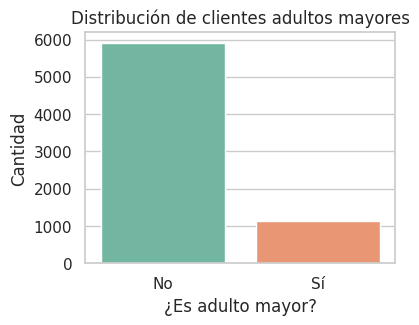

In [124]:
# Convertir 'SeniorCitizen' a categoría para mejorar visualización
df_telecom['SeniorLabel'] = df_telecom['customer.SeniorCitizen'].map({0: 'No', 1: 'Sí'})
sns.set(style="whitegrid")

# Gráfico 1: Distribución de SeniorCitizen
plt.figure(figsize=(4,3))
sns.countplot(data=df_telecom, x='SeniorLabel', hue='SeniorLabel', palette='Set2', legend=False)

plt.title("Distribución de clientes adultos mayores")
plt.xlabel("¿Es adulto mayor?")
plt.ylabel("Cantidad")
plt.show()


In [125]:
print('c. Uso de servicios adicionales : Clientes sin servicios de valor agregado como seguridad en línea o soporte técnico suelen irse más.')
df_telecom.groupby('internet.OnlineSecurity')['Churn'].value_counts(normalize=True).unstack()*100


c. Uso de servicios adicionales : Clientes sin servicios de valor agregado como seguridad en línea o soporte técnico suelen irse más.


Churn,No,Yes
internet.OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


In [126]:
print('c. Uso de servicios adicionales : Clientes sin servicios de valor agregado como seguridad en línea o soporte técnico suelen irse más.')
df_telecom.groupby('internet.TechSupport')['Churn'].value_counts(normalize=True).unstack()*100


c. Uso de servicios adicionales : Clientes sin servicios de valor agregado como seguridad en línea o soporte técnico suelen irse más.


Churn,No,Yes
internet.TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


In [127]:
print('d. Método de pago y facturación sin papel : Pagos electrónicos o facturación sin papel\n pueden estar relacionados con más churn (posible falta de control del cliente sobre sus pagos).')
df_telecom.groupby('account.PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()


d. Método de pago y facturación sin papel : Pagos electrónicos o facturación sin papel
 pueden estar relacionados con más churn (posible falta de control del cliente sobre sus pagos).


Churn,No,Yes
account.PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


In [128]:
#print('d. Método de pago y facturación sin papel : Pagos electrónicos o facturación sin papel pueden estar relacionados con más churn (posible falta de control del cliente sobre sus pagos).')
df_telecom.groupby('account.PaymentMethod')['Churn'].value_counts(normalize=True).unstack()



Churn,No,Yes
account.PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [129]:
print('3. Análisis Multivariado (por ejemplo, con un modelo de árbol de decisión)')
print('Podés usar un modelo para ver qué variables predicen mejor el churn:')
print('Este ranking te dice qué variables están más relacionadas con el churn.\n')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_model = df_telecom.copy()
for col in df_model.select_dtypes(include='object'):
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

X = df_model.drop(columns=['Churn', 'customerID'])
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10)*100)


3. Análisis Multivariado (por ejemplo, con un modelo de árbol de decisión)
Podés usar un modelo para ver qué variables predicen mejor el churn:
Este ranking te dice qué variables están más relacionadas con el churn.

account.Contract            53.732553
customer.tenure             15.067076
internet.TechSupport        12.044028
internet.InternetService     6.569885
account.Charges.Monthly      6.354533
account.Charges.Total        3.981799
account.PaperlessBilling     0.895420
internet.OnlineSecurity      0.542938
phone.PhoneService           0.413493
customer.gender              0.202663
dtype: float64


Conclusiones: los principales motivos de pérdida de clientes suelen ser:
* Contrato mensual (poca fidelización).
* No tener servicios de valor agregado (seguridad, soporte técnico).
* Pagos electrónicos automáticos sin interacción humana.
* Cargos mensuales altos.
* Falta de dependientes o pareja (clientes solos tienden a irse más fácilmente).

### Interpretación mapa de calor de correlaciones

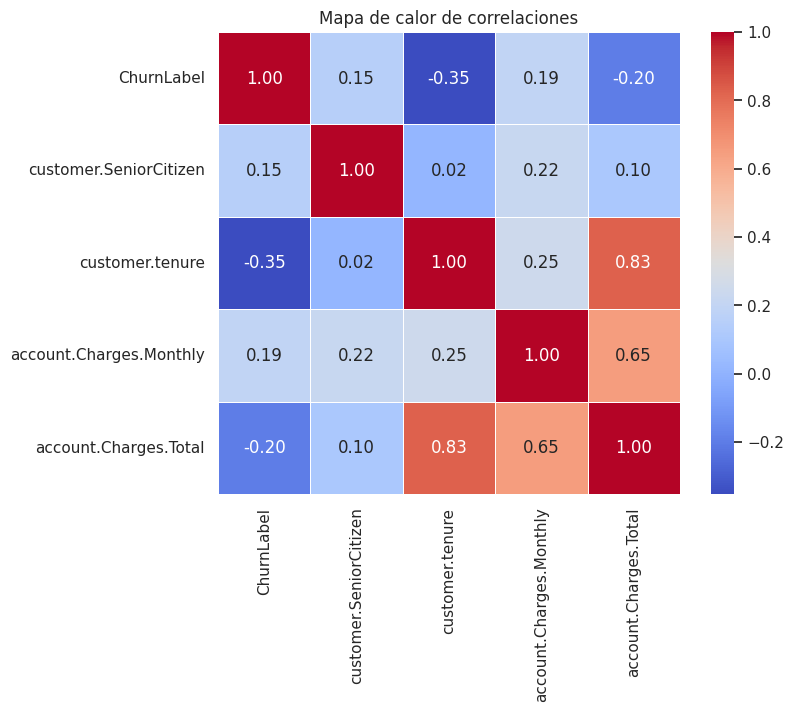

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_telecom['ChurnLabel'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})

columnas_numericas = [
    'ChurnLabel',
    'customer.SeniorCitizen',
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

# Convertir columnas si es necesario
df_telecom[columnas_numericas] = df_telecom[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Calcular correlaciones
corr = df_telecom[columnas_numericas].corr()

# Graficar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()



- ChurnLabel:
  - Tiene una correlación negativa moderada con customer.tenure (-0.35), lo que indica que los clientes con mayor tiempo de permanencia tienen menos probabilidad de cancelar.
  - Tiene una correlación negativa más leve con account.Charges.Total (-0.20), sugiriendo que los clientes que han gastado más en total son menos propensos a hacer churn.
  - Tiene correlación positiva baja con customer.SeniorCitizen (0.15), lo que significa que ser un cliente mayor tiene una leve influencia en la cancelación.
  - También hay una correlación positiva baja con account.Charges.Monthly (0.19), indicando que clientes con pagos mensuales más altos podrían ser un poco más propensos a cancelar.
- customer.tenure (Antigüedad del cliente):
  - Tiene una correlación positiva fuerte con account.Charges.Total (0.83). Esto tiene sentido: los clientes con más meses de permanencia han gastado más en total.
  - También tiene una correlación positiva baja con account.Charges.Monthly (0.25), indicando que los clientes con más tiempo suelen pagar montos mensuales ligeramente más altos.
- account.Charges.Monthly (Pago mensual):
  - Tiene una correlación moderada con account.Charges.Total (0.65), lo que muestra que los clientes con pagos mensuales altos tienden a haber gastado más en total.




### Análisis de la distribución de datos (Solo Ex Clientes)

In [131]:
print('Estadistica descriptiva de columnas númericas del data frame df_telecom_exclientes:\n')
df_telecom_exclientes.describe()


Estadistica descriptiva de columnas númericas del data frame df_telecom_exclientes:



,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332
std,0.435799,19.531123,24.666053
min,0.000000,1.000000,18.850000
25%,0.000000,2.000000,56.150000
50%,0.000000,10.000000,79.650000
75%,1.000000,29.000000,94.200000
max,1.000000,72.000000,118.350000



#### Campo : customer.SeniorCitizen (cliente adulto mayor)
- Media (mean): 0.25 → Solo el 25.5% de los clientes que se fueron son personas mayores.
- Mínimo (min): 0 → Hay clientes jóvenes en el conjunto.
- Máximo (max): 1 → Algunos clientes mayores cancelaron el servicio.
- Distribución (25%, 50%, 75%): La mayoría de los ex-clientes no son mayores.

💡 Conclusión: Ser un cliente mayor no parece ser un factor determinante en la cancelación.

#### Campo : customer.tenure (Tiempo como cliente)
- Media (mean): 17.98 → Los clientes que cancelaron tenían, en promedio, 18 meses de servicio.
- Desviación estándar (std): 19.53 → Hay bastante variabilidad, algunos clientes duraron poco y otros mucho.
- Mínimo (min): 1 → Hubo clientes que cancelaron en su primer mes.
- Máximo (max): 72 → Algunos clientes estuvieron hasta 6 años antes de cancelar.
- Distribución (25%, 50%, 75%):
  - 25% de los clientes cancelaron en 2 meses o menos.
  - 50% cancelaron dentro de 10 meses.
  - 75% se mantuvieron hasta 29 meses antes de irse.

💡 Conclusión: La mayoría de los clientes que cancelan son nuevos (menos de 10 meses de servicio). Los que permanecen por más tiempo son más leales.

#### Campo: account.Charges.Monthly (Pago Mensual)
- Media (mean): 74.44 → En promedio, los clientes que se fueron pagaban 74.44 al mes.
- Desviación estándar (std): 24.67 → Hay variabilidad en los montos mensuales.
- Mínimo (min): 18.85 → Algunos clientes pagaban muy poco al mes.
- Máximo (max): 118.35 → Otros pagaban bastante más.
- Distribución (25%, 50%, 75%):
- 25% pagaban menos de 56.15 al mes.
- 50% pagaban alrededor de 79.65.
- 75% pagaban hasta 94.20.

💡 Conclusión: Los clientes con pagos mensuales moderados o altos parecen más propensos a cancelar. Podría indicar que precios altos afectan la decisión de permanencia.

#### Campo: account.Charges.Total (Total gastado)
- Media (mean): 1531.79 → En promedio, los ex-clientes gastaron 1,531 en total.
- Desviación estándar (std): 1890.82 → Gran variabilidad en el gasto total.
- Mínimo (min): 18.85 → Algunos clientes apenas gastaron antes de cancelar.
- Máximo (max): 8684.80 → Otros clientes gastaron hasta 8,684 antes de irse.
- Distribución (25%, 50%, 75%):
- 25% gastaron menos de 134.50 (clientes nuevos).
- 50% gastaron alrededor de 703.55.
- 75% gastaron hasta 2,331.30.

💡 Conclusión: Muchos clientes que cancelan han gastado poco en total, lo que refuerza la idea de que los nuevos clientes tienen más probabilidades de irse.






#📄Informe final

###Conclusiones
- Alta tasa de cancelación temprana: Muchos clientes no superan los primeros meses. Puede indicar falta de satisfacción inicial, problemas de instalación o mal servicio percibido.
- El tiempo de permanencia es un factor clave para la retención de clientes, se recomienda promociones o campañas para fidelizar al cliente.
- Cliente con servicios adicionales como: OnlineSecurity, TechSupport o Backup, tienden a permanecer.
- El tipo de pago (Electronic check), suele estar más asociado al abandono, se recomienda brindar opciones más accesibles de pago.
- La edad no parece ser un gran predictor, las promociones o campañas no deben basarce en la edad del cliente.
- Los clientes que gastan poco en total son más propensos a irse, se recomienda promociones de uso gratuito por meses de los servicios adicionales para que el cliente experimente las ventajas que brinda.

















